# Adam API usage example
https://docs.neanias.eu/projects/c2-dataexploration/en/latest/


In [95]:
import os
import pickle
import shutil
from tqdm import tqdm
import multiprocessing
from pathlib import Path
from functools import partial
import matplotlib.pyplot as plt
from datetime import date, datetime
from dateutil.relativedelta import relativedelta

import adamapi
from adamapi import Auth
from adamapi import Search
from adamapi import GetData
from adamapi import Datasets

In [96]:
a = Auth()
a.setKey(os.environ["ADAM_API_KEY"])
a.setAdamCore("https://explorer-space.adamplatform.eu")
a.authorize()

{'expires_at': '2022-05-19T11:16:45.480Z',
 'access_token': 'fdd95489ab27450f973c5b6303a6c79c',
 'refresh_token': '89c67b4f1e884728973c1a49f40cd8fc',
 'expires_in': 3600}

In [17]:
datasets = Datasets(a)
items = datasets.getDatasets()
print( "Available datasets:")
for key in items: 
    print( key )

Available datasets:
type
properties
58592:MRO_CTX


In [18]:
datasetId = "58592:MRO_CTX"

In [19]:
metadata = datasets.getDatasets(datasetId)
metadata

{'datasetId': 'MRO_CTX',
 'creationDate': '2021-04-13T15:23:24Z',
 'dataType': 'Float32',
 'epsg': '4326',
 'keywords': [],
 'license': {'documentationUrl': '',
  'dataProviderName': 'Jacobs University',
  'dataProviderUrl': '',
  'licenseId': '',
  'dataPolicy': '',
  'doi': '',
  'credits': ''},
 'maxDate': '2020-08-31T18:19:37Z',
 'maxValue': [0.2],
 'minDate': '2006-03-24T04:41:07Z',
 'minValue': [-0.02],
 'noDataValue': -9999,
 'numberOfRecords': 7495,
 'profile': {'profileSchema': 'space_profile.json',
  'name': 'Space',
  'targetName': 'MARS',
  'observationMode': 'EDR',
  'instrument': 'CONTEXT CAMERA',
  'instrumentId': 'CTX',
  'mission': 'MARS RECONNAISSANCE ORBITER',
  'missionId': 'MRO',
  'processingLevel': '',
  'solarLongitudeMin': '',
  'solarLongitudeMax': '',
  'solarDistanceMin': '',
  'solarDistanceMax': '',
  'solarLongitudeStart': '',
  'solarLongitudeEnd': '',
  'EmissionAngleMax': 32.39,
  'EmissionAngleMin': 0.03,
  'IncidenceAngleMax': 86.83,
  'IncidenceAngl

In [20]:
print(f"Number of images: {metadata['numberOfRecords']}")

Number of images: 7495


## Count all products

In [25]:
min_start_date = date(2006, 3, 24)
max_end_date = date(2020, 8, 30)

In [80]:
def downloadMetadata(auth, start_date, end_date):
    search = Search(auth)
    maxRec = 200
    search_result = search.getProducts(
        datasetId,
        maxRecords=maxRec,
        startIndex=0,
        outputAttributes=['productId'],
        startDate=start_date,
        endDate=end_date
    )
    total_products = len(search_result['content'])
    print(f"Total products: {total_products}")
    if total_products > 0:
        return search_result["content"]
    else:
        return []

In [81]:
files_metadata = []

In [82]:
start_date = min_start_date #date(2015, 7, 1)
end_date = max_end_date #date(2016, 1, 1)
days = 15

In [83]:
while start_date < end_date:
    next_date = start_date + relativedelta(days=days)
    print(f"Download data from {start_date} - {next_date}")    
    files_metadata = files_metadata + downloadMetadata(a, start_date, next_date)
    start_date = next_date

Download data from 2006-03-24 - 2006-04-08
Total products: 0
Download data from 2006-04-08 - 2006-04-23
Total products: 0
Download data from 2006-04-23 - 2006-05-08
Total products: 0
Download data from 2006-05-08 - 2006-05-23
Total products: 0
Download data from 2006-05-23 - 2006-06-07
Total products: 0
Download data from 2006-06-07 - 2006-06-22
Total products: 0
Download data from 2006-06-22 - 2006-07-07
Total products: 0
Download data from 2006-07-07 - 2006-07-22
Total products: 0
Download data from 2006-07-22 - 2006-08-06
Total products: 0
Download data from 2006-08-06 - 2006-08-21
Total products: 0
Download data from 2006-08-21 - 2006-09-05
Total products: 0
Download data from 2006-09-05 - 2006-09-20
Total products: 0
Download data from 2006-09-20 - 2006-10-05
Total products: 0
Download data from 2006-10-05 - 2006-10-20
Total products: 0
Download data from 2006-10-20 - 2006-11-04
Total products: 0
Download data from 2006-11-04 - 2006-11-19
Total products: 9
Download data from 2006-

Total products: 3
Download data from 2011-10-09 - 2011-10-24
Total products: 3
Download data from 2011-10-24 - 2011-11-08
Total products: 3
Download data from 2011-11-08 - 2011-11-23
Total products: 1
Download data from 2011-11-23 - 2011-12-08
Total products: 3
Download data from 2011-12-08 - 2011-12-23
Total products: 4
Download data from 2011-12-23 - 2012-01-07
Total products: 5
Download data from 2012-01-07 - 2012-01-22
Total products: 2
Download data from 2012-01-22 - 2012-02-06
Total products: 3
Download data from 2012-02-06 - 2012-02-21
Total products: 3
Download data from 2012-02-21 - 2012-03-07
Total products: 5
Download data from 2012-03-07 - 2012-03-22
Total products: 4
Download data from 2012-03-22 - 2012-04-06
Total products: 1
Download data from 2012-04-06 - 2012-04-21
Total products: 0
Download data from 2012-04-21 - 2012-05-06
Total products: 2
Download data from 2012-05-06 - 2012-05-21
Total products: 2
Download data from 2012-05-21 - 2012-06-05
Total products: 3
Downlo

Total products: 1
Download data from 2017-04-25 - 2017-05-10
Total products: 3
Download data from 2017-05-10 - 2017-05-25
Total products: 1
Download data from 2017-05-25 - 2017-06-09
Total products: 0
Download data from 2017-06-09 - 2017-06-24
Total products: 0
Download data from 2017-06-24 - 2017-07-09
Total products: 0
Download data from 2017-07-09 - 2017-07-24
Total products: 0
Download data from 2017-07-24 - 2017-08-08
Total products: 0
Download data from 2017-08-08 - 2017-08-23
Total products: 0
Download data from 2017-08-23 - 2017-09-07
Total products: 0
Download data from 2017-09-07 - 2017-09-22
Total products: 1
Download data from 2017-09-22 - 2017-10-07
Total products: 0
Download data from 2017-10-07 - 2017-10-22
Total products: 0
Download data from 2017-10-22 - 2017-11-06
Total products: 0
Download data from 2017-11-06 - 2017-11-21
Total products: 0
Download data from 2017-11-21 - 2017-12-06
Total products: 0
Download data from 2017-12-06 - 2017-12-21
Total products: 0
Downlo

In [84]:
len(files_metadata)

905

In [85]:
pickle.dump(files_metadata, open("./files_metadata.pickle", 'wb'))

In [86]:
with open("./files_metadata.pickle", "rb") as metadata_file:
    products_metadata = pickle.load(metadata_file)    

In [87]:
products_metadata[0]

{'_id': {'$oid': '6277da7659de28212c0b872a'},
 'datasetId': 'MRO_CTX',
 'productDate': '2006-11-18T11:22:44Z',
 'productId': 'P01_001463_2077_XN_27N264W.tif',
 'version': 'npt05',
 'EmissionAngle': 0.08,
 'IncidenceAngle': 48.52,
 'MapScale': 5.66,
 'ObservationTime': '2006-11-18T11:22:55.215',
 'PhaseAngle': 48.51,
 'geometry': {'geometries': [{'type': 'Polygon',
    'coordinates': [[[95.0097617, 26.9026088],
      [95.6986405, 26.9026088],
      [95.7061593, 28.0811555],
      [95.0098667, 28.0811555],
      [95.0097617, 26.9026088]]]}],
  'type': 'GeometryCollection'},
 'insertDate': '2022-05-08T14:57:58Z',
 'instrument': 'CONTEXT CAMERA',
 'instrumentId': 'CTX',
 'mission': 'MARS RECONNAISSANCE ORBITER',
 'missionId': 'MRO',
 'observationMode': 'EDR',
 'status': '',
 'targetName': 'MARS'}

In [88]:
first_product = products_metadata[0]["productId"]
first_product

'P01_001463_2077_XN_27N264W.tif'

In [89]:
products_dates = [ datetime.fromisoformat(md["productDate"][:-1]+'+00:00') for md in products_metadata]

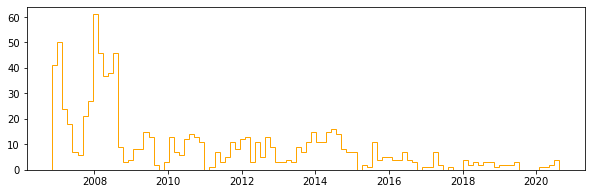

In [90]:
plt.figure(figsize=(10, 3))
_ = plt.hist(products_dates, bins=100, color="orange", histtype="step")

In [97]:
from adamapi import GetData
data=GetData(a)
data.getData(datasetId, productId = products_metadata[1]["productId"], outputFname=f"./{first_product}")

UnboundLocalError: local variable 'response_order' referenced before assignment

## Download data

In [58]:
def extract_zip(output_dir, zip_file):

    unzipped_datafile = output_dir.joinpath(zip_file.stem)
    
    if not unzipped_datafile.exists():
        print(f"Unzipping {zip_file}..")
        shutil.unpack_archive(zip_file, output_dir)
    else:
        print(f"Unzipped file already exists: {unzipped_datafile}")

In [61]:
datapath_unzipped = Path("/shared_volume/tif")

In [63]:
with open("./files_metadata.pickle", "rb") as metadata_file:
    products_metadata = pickle.load(metadata_file)    

In [68]:
tmp_dir = Path("/tmp/adam_api_tif_zip")
if tmp_dir.exists():
    shutil.rmtree(tmp_dir)
tmp_dir.mkdir(parents=True)

In [69]:
adam_data_service = GetData(a)

for product_metadata in tqdm(products_metadata[0:20]):

    adam_data_service.getData(datasetId, productId = product_metadata["productId"], outputFname=tmp_dir.joinpath(product_metadata["productId"]).with_suffix(".tif.zip"))

 10%|██████████                                                                                           | 2/20 [00:13<02:00,  6.70s/it]


UnboundLocalError: local variable 'response_order' referenced before assignment

### Extracting data

In [70]:
zipped_data_files = [tmp_dir.joinpath(f) for f in os.listdir(tmp_dir) if tmp_dir.joinpath(f).exists() and ".tif.zip" in f]

In [72]:
datapath_unzipped.mkdir(exist_ok=True, parents=True)

pool = multiprocessing.Pool(processes=5)

pool.map(partial(extract_zip, datapath_unzipped), zipped_data_files)

Unzipped file already exists: /shared_volume/tif/P01_001414_1780_XI_02S005W.tifUnzipped file already exists: /shared_volume/tif/P01_001418_2494_XI_69N125W.tif



[None, None]